<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Earthquake-damage-prediction---Nepal-2015" data-toc-modified-id="Earthquake-damage-prediction---Nepal-2015-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Earthquake damage prediction - Nepal 2015</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Baseline---Naive-model,-that-estimates-the-majority-class" data-toc-modified-id="Baseline---Naive-model,-that-estimates-the-majority-class-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Baseline - Naive model, that estimates the majority class</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Metrics" data-toc-modified-id="Metrics-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>Metrics</a></span></li></ul></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Save-the-trained-model-with-pickle" data-toc-modified-id="Save-the-trained-model-with-pickle-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Save the trained model with pickle</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Submission</a></span></li></ul></li><li><span><a href="#Submission-score" data-toc-modified-id="Submission-score-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Submission score</a></span></li><li><span><a href="#Model---RF-analysis" data-toc-modified-id="Model---RF-analysis-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Model - RF analysis</a></span><ul class="toc-item"><li><span><a href="#Gradient-boosting" data-toc-modified-id="Gradient-boosting-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Gradient boosting</a></span></li></ul></li></ul></li></ul></div>

## Earthquake damage prediction - Nepal 2015

This work uses various features of buildings recorded from 2015 Earthquake at Gorkha, Nepal to predict the intensity of damage a building would sustain, given the features. The damage are classified into 3 grades (1, 2, 3), denoting low damage, medium damage and high damage. 

The metrics used to evaluate is "f1_micro"

### EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from dython.nominal import associations

In [2]:
X = pd.read_csv("train_values.csv")
labels = pd.read_csv("train_labels.csv")

In [3]:
print(X.shape)
X.head(3)

(260601, 39)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(labels.shape)
labels.head(3)

(260601, 2)


,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3


The number of records of X and y are exactly the same. X has all the features and y has their corresponding labels. We can merge both on _building_id_.

In [5]:
df = X.merge(labels, on = "building_id" )

In [6]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

The dataset has no non-null values. We shall explore the various features provided.

In [8]:
df.nunique()

building_id                               260601
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_mud_mortar_brick            2
has_superstructure_c

It seams that most of the features are categorical, with many being a binary feature (probably an yes/no feature). Let's get the column names of all the columns that has unique values less than 10 and further investigate.

In [9]:
categorical_columns = df.nunique()[df.nunique() <= 10].index

categorical_columns

Index(['count_floors_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_seco

In [10]:
cmap = sns.light_palette("#000000", as_cmap=True)
association = associations(df[categorical_columns].astype(str), compute_only = True)

plt.subplots(figsize = (10, 7))
sns.heatmap(association["corr"], mask = np.tril(association["corr"]) == 0, cmap = cmap, linewidths = 0.2)

KeyboardInterrupt: 

From the associations plot, we can see that the features foundation type, roof rype, ground floor type, other floor type and position are highly associated with the superstructure features. Let's only use the superstructure features.

Also, it can be seen that "has_secondary_use" is just a redundant information, probably if any of the secondary use column is true, then "has_secondary_use" would also be marked as True. Let's verify this.

In [10]:
has_sec_df = df[[col for col in categorical_columns if "has_secondary" in col]]

has_sec_df

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
260596,0,0,0,0,0,0,0,0,0,0,0
260597,0,0,0,0,0,0,0,0,0,0,0
260598,0,0,0,0,0,0,0,0,0,0,0
260599,0,0,0,0,0,0,0,0,0,0,0


In [11]:
(has_sec_df.iloc[:, 1:].sum(axis = 1) == has_sec_df.iloc[:, 0]).all()

False

In [12]:
print(has_sec_df[(has_sec_df.iloc[:, 1:].sum(axis = 1) != has_sec_df.iloc[:, 0])].shape)

has_sec_df[(has_sec_df.iloc[:, 1:].sum(axis = 1) != has_sec_df.iloc[:, 0])].head(5)

(557, 11)


,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
304,1,1,0,0,0,0,0,0,0,0,1
1408,1,1,0,0,0,0,0,0,0,0,1
1593,1,1,0,0,0,0,0,0,0,0,1
2329,1,1,0,0,0,0,0,0,0,0,1
3704,1,0,1,0,0,0,0,0,0,0,1


From the investigation, it seems that few records has multiple secondary purpose, which was inferred after checking if the sum of all the secondary uses equals to "has_secondary_use" column. 

But still, the "has_secondary_use" is redundant as our initial guess. With that, we can have two approaches while training the model. 
* Only using the main column.
* Dropping the main column and using every other columns.

The building height feature and the floor count feature would probably be highly correlated. Let's check their correlation coefficient.

In [13]:
print("Pearson-correlation between height and the number of floors is",df["height_percentage"].corr(df["count_floors_pre_eq"]))

Pearson-correlation between height and the number of floors is 0.7727343845139328


They have a high correlation. Let's see, which contributes most in predicting the label by determining the correlation-coefficient with the target variable.

In [14]:
df[["height_percentage", "count_floors_pre_eq"]].corrwith(df["damage_grade"])

height_percentage      0.048130
count_floors_pre_eq    0.122308
dtype: float64

Floor count has 12% pearson-coefficient with the damage grade. So, we can drop height_percentage.

In [15]:
categorical_columns

Index(['count_floors_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_seco

Initial assumption of important categorical features that contributes to the damage prediction from the correlation plot are,

* Land surface condition
* Has adobe mud superstructure
* Has mud-mortar-stone super-structure
* Has superstructure stone flag
* Has cement-mortar-stone super-structure
* Has cement-mortat-brick super-structure
* Has super-structure timber
* Has super-structure bamboo
* Has super-structure-RC non-engineered
* Has super-structure-RC engineered
* Has secondary use

The floor count feature should problably be a numerical feature as the number of floor should influence the co-efficient of feature importance in predicting the damage grade

Let's now get the remaining numerical variables

In [16]:
numerical_columns = [col for col in df.columns if col not in categorical_columns]

numerical_columns

['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'age',
 'area_percentage',
 'height_percentage']

In [17]:
df[numerical_columns].iloc[:,1:4].nunique()

geo_level_1_id       31
geo_level_2_id     1414
geo_level_3_id    11595
dtype: int64

The geo_level represents the geographical location of the building. It does not make sense to use them as numerical feature. As an initial approach, we shall add level 1 into the categorical column and drop level 2 and level 3.

Age of the building and the area are the features, that should be used in building our model. Height feature can be dropped as it has a high correlation with floor count.

Let's plot the distribution of other numerical columns

In [18]:
from ipywidgets import interactive, widgets

In [19]:
def hist_plot(column, bins):
    return sns.histplot(df[column], bins = bins)

interactive(hist_plot, column = widgets.Dropdown(options = numerical_columns[4:]), bins = widgets.SelectionSlider(options = np.arange(10,100,10)))
                                                

interactive(children=(Dropdown(description='column', options=('age', 'area_percentage', 'height_percentage'), …

All three distributions are left skewed with potential outliers that could fluctuate the model's performance. 

Let's use describe function to get an idea of the quantiles.

In [20]:
df[numerical_columns[4:]].describe()

,age,area_percentage,height_percentage
count,260601.000000,260601.000000,260601.000000
mean,26.535029,8.018051,5.434365
std,73.565937,4.392231,1.918418
min,0.000000,1.000000,2.000000
25%,10.000000,5.000000,4.000000
50%,15.000000,7.000000,5.000000
75%,30.000000,9.000000,6.000000
max,995.000000,100.000000,32.000000


Clearly, there is a great variance between the 75% range and the max in all three features. This would potentially fluctuate the model performane.

* We should truncate the outliers to a threshold

In [21]:
df[numerical_columns[4:]].quantile(0.90)

age                  45.0
area_percentage      13.0
height_percentage     8.0
Name: 0.9, dtype: float64

Let's truncate all the values above 90% quantile to 90%.

In [22]:
categorical_features = np.array(
    ["geo_level_1_id", "land_surface_condition", "plan_configuration", "has_superstructure_adobe_mud",
     "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag", 
     "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick",
     "has_superstructure_cement_mortar_brick", "has_superstructure_timber",
     "has_superstructure_bamboo", "has_superstructure_rc_non_engineered", 
     "has_superstructure_rc_engineered", "has_secondary_use"])

categorical_features

array(['geo_level_1_id', 'land_surface_condition', 'plan_configuration',
       'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_secondary_use'],
      dtype='<U38')

In [23]:
numerical_features = np.array(
    ["count_floors_pre_eq", "age", "area_percentage"]
)

numerical_features

array(['count_floors_pre_eq', 'age', 'area_percentage'], dtype='<U19')

## Models

Let's build a custom transformer that handles the outliers

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, ClassifierMixin, clone
from sklearn.metrics import confusion_matrix, f1_score

In [25]:
class OutlierTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, upper = 0.9):
        self.upper = upper
        
    def fit(self, X, y = None):
        if isinstance(X, pd.DataFrame):
            self.cols_ = X.columns
            self.limit_ = np.ones(len(self.cols_))
            
            for i in range(len(self.cols_)):
                self.limit_[i] = X.iloc[:,i].quantile(self.upper)
                
        elif isinstance(X, pd.Series):
            self.limit_ = X.quantile(self.upper)
        
        return self
    
    def transform(self, X):
        X = X.copy()
        if isinstance(X, pd.DataFrame):
            array = np.array(X)
            for i in range(len(self.cols_)):
                array[:,i][array[:,i] > self.limit_[i]] = self.limit_[i]
                
            return array
        
        elif isinstance(X, pd.Series):
            return np.array(X.apply(lambda x: self.limit_ if x > self.limit_ else x))

In [26]:
OutlierTransformer(0.92).fit_transform(df[numerical_columns])

array([[802906,      6,    487, ...,     30,      6,      5],
       [ 28830,      8,    900, ...,     10,      8,      7],
       [ 94947,     21,    363, ...,     10,      5,      5],
       ...,
       [602512,     17,     51, ...,     50,      6,      7],
       [151409,     26,     39, ...,     10,     14,      6],
       [747594,     21,      9, ...,     10,      7,      6]], dtype=int64)

Let's define a function, that prints the score and confusion matrix of a model.

In [27]:
def metric(model, X, y):
    print("f1-micro score: ", round(f1_score(y, model.predict(X), average = "micro"), 4))
    
    cm = confusion_matrix(y, model.predict(X))
    cm_df = pd.DataFrame(cm, 
                         index = ["Grade 1", "Grade 2", "Grade 3"],
                         columns = ["Grade 1", "Grade 2", "Grade 3"])

    sns.heatmap(cm_df, annot = True, 
                cmap = ListedColormap(["white"]), 
                linewidths = 0.2, 
                linecolor = "black", 
                cbar = False, 
                fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values', size = 12)
    plt.xlabel('Predicted Values', size = 12)
    plt.show()

### Baseline - Naive model, that estimates the majority class

In [28]:
y = labels["damage_grade"]

In [29]:
class MajorityEstimator(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.majority_ = y.value_counts().idxmax()
        return self
        
    def predict(self, X):
        return self.majority_ * np.ones(len(X))

In [30]:
naive_model = MajorityEstimator().fit(X, y)

In [31]:
y_pred_naive = naive_model.predict(X)

f1-micro score:  0.5689


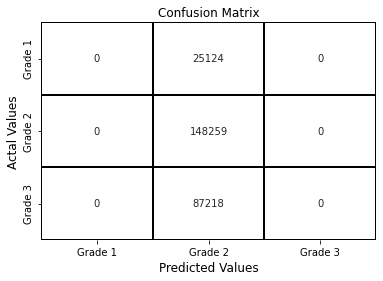

In [32]:
metric(naive_model, X, y)

The baseline f1-micro score is 0.5689.

### Logistic regression
Let's start with a simple Logistic regression model with cross-validation and see how well it performs.

In [33]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
column_selector = ColumnTransformer([
    ("categorical", OneHotEncoder(), categorical_features),
    ("numerical", OutlierTransformer(0.9), numerical_features)
])

In [37]:
pipe_lr = Pipeline([
    ("selector", column_selector),
    ("scaler", StandardScaler(with_mean = False)),
    ("classifier", LogisticRegressionCV(n_jobs = -4, random_state = 42))
])

In [38]:
lr_model = pipe_lr.fit(X_train, y_train)

KeyboardInterrupt: 

##### Metrics

f1-micro score:  0.6662


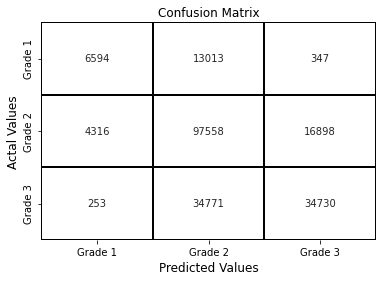

In [237]:
metric(lr_model, X_train, y_train)

Our initial model seems to have performed pretty well comparing to the naive model. Let's see how well it generalizes the test features.

f1-micro score:  0.6661


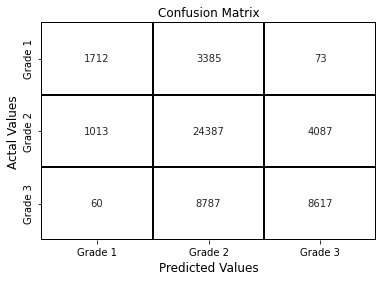

In [238]:
metric(lr_model, X_test, y_test)

The model is definitely not overfitting. The train and test scores are almost the same.

Now, let's try grouping by the geo_level_1_id and train a seperate model for each level_1_id and see if it improves the performance.

We will define a custom classifier to do this classification.

In [35]:
class GroupByEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, model_base, group):
        self.model_base = model_base
        self.group = group
        
    def fit(self, X, y):
        self.models_ = {}
        
        for field, df in X.groupby(self.group):
            self.models_[field] = clone(self.model_base).fit(df, y.loc[df.index])
     
        return self
    
    def predict(self, X):
        y_pred = pd.Series(0, index = X.index)
        
        for field, df in X.groupby(self.group):
            y_pred.loc[df.index] = self.models_[field].predict(df)
            
        return y_pred

In [40]:
categorical_features_groupby_geo1 = categorical_features[1:]

In [41]:
column_selector_groupby_lr = ColumnTransformer([
    ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_features_groupby_geo1),
    ("numerical", OutlierTransformer(0.9), numerical_features)
])

In [253]:
pipe_groupby_lr = Pipeline([
    ("selector", column_selector_groupby_lr),
    ("scaler", StandardScaler(with_mean = False)),
    ("classifier", LogisticRegressionCV(n_jobs = -4, random_state = 42, max_iter=5000))
])

In [254]:
group_by_model_lr = GroupByEstimator(pipe_groupby_lr, "geo_level_1_id").fit(X_train, y_train)

f1-micro score:  0.6767


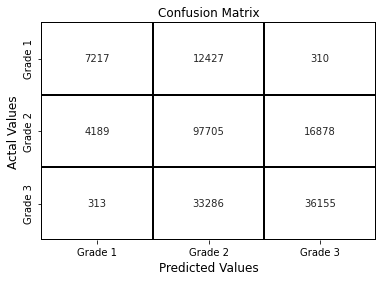

In [255]:
metric(group_by_model_lr, X_train, y_train)

f1-micro score:  0.6728


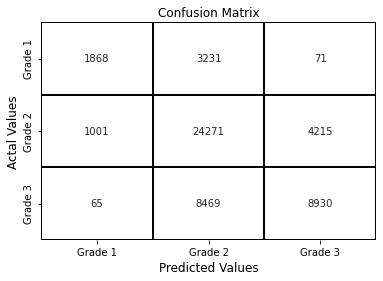

In [256]:
metric(group_by_model_lr, X_test, y_test)

About one percent increase in the score when we use the groupby approach.

Let's train seperate models based upon the land surface condition and see how well it performs.

In [42]:
categorical_features_groupby_surf = np.delete(categorical_features, 1)
categorical_features_groupby_surf

array(['geo_level_1_id', 'plan_configuration',
       'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_secondary_use'],
      dtype='<U38')

In [43]:
column_selector_groupby_surf_lr = ColumnTransformer([
    ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_features_groupby_surf),
    ("numerical", OutlierTransformer(0.9), numerical_features)
])

In [44]:
pipe_groupby_surf_lr = Pipeline([
    ("selector", column_selector_groupby_surf_lr),
    ("scaler", StandardScaler(with_mean = False)),
    ("classifier", LogisticRegressionCV(n_jobs = -4, random_state = 42, max_iter=5000))
])

In [46]:
metric(group_by_model_surf_lr, X_train, y_train)

NameError: name 'group_by_model_surf_lr' is not defined

In [47]:
metric(group_by_model_surf_lr, X_test, y_test)

NameError: name 'group_by_model_surf_lr' is not defined

The model is not performing better. Let's move to more complicated models.

###  Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

We'll use all the features provided in the dataset and do a k-fold search to find the optimal features to be used. Let's also do a k-fold search for the maximum depth.

In [52]:
column_selector_rf = ColumnTransformer([
    ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_columns[:-1]),
    ("numerical", OutlierTransformer(), numerical_columns)
])

In [53]:
pipe_rf = Pipeline([
    ("selector", column_selector_rf),
    ("scaler", StandardScaler(with_mean = False)),
    ("classifier", RandomForestClassifier(random_state = 42, n_estimators = 50))
])

In [77]:
param_grid = {"selector__numerical__upper": np.linspace(0.9, 1, 10),
              "classifier__max_depth" : np.arange(6, 21), 
              "classifier__max_features" : np.arange(28, 40)}

grid_search_rf = RandomizedSearchCV(pipe_rf, param_grid, cv = 5, scoring = "f1_micro", n_iter = 30, verbose = 1)

In [78]:
model_rf = grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [79]:
model_rf.best_params_

{'selector__numerical__upper': 0.9,
 'classifier__max_features': 37,
 'classifier__max_depth': 20}

f1-micro score:  0.8703


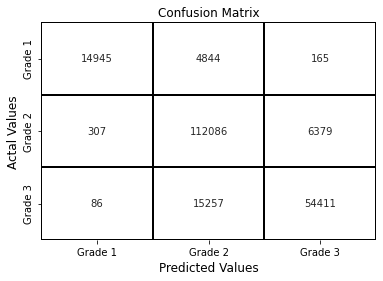

In [80]:
metric(model_rf, X_train, y_train)

f1-micro score:  0.7252


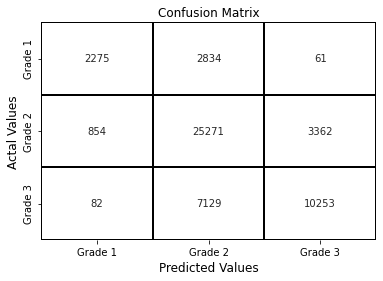

In [81]:
metric(model_rf, X_test, y_test)

The initial RF model cannot generalize the results. However, 

* The train score is 86.41%
* The test score of 72.51% is still the best of all the models till now.
* The model performance can definitely be improved to reduce the variance.

#### Save the trained model with pickle

In [82]:
import pickle

pickle.dump(model_rf, open("randomforestmodel.mod", "wb"))

PicklingError: Can't pickle <class '__main__.OutlierTransformer'>: it's not the same object as __main__.OutlierTransformer

In [83]:
model_rf = pickle.load(open("randomforestmodel.mod", "rb"))

EOFError: Ran out of input

f1-micro score:  0.7252


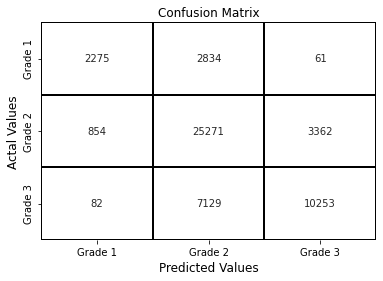

In [84]:
metric(model_rf, X_test, y_test)

#### Submission
Let's do a submission and see how well the model performs on the submission dataset.

In [55]:
submission_format = pd.read_csv("submission_format.csv")

In [56]:
X_test_competition = pd.read_csv("test_values.csv")

In [57]:
submission_format["damage_grade"] = model_rf.predict(X_test_competition)

In [58]:
submission_format.to_csv("y_test_random_forest.csv", index = False)

### Submission score

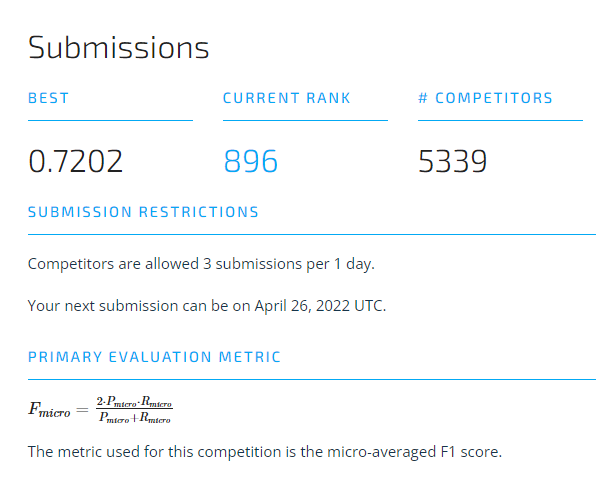

### Model - RF analysis

In [277]:
model_rf[-1]

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])},
                   scoring='r2')

In [278]:
model_rf[-1].best_params_

{'max_features': 28, 'max_depth': 20}

In [279]:
model_rf_cv_results = (pd.DataFrame(model_rf[-1].cv_results_)
                       .drop(["params"], axis = 1)
                       .sort_values("rank_test_score")
                       .set_index("rank_test_score"))

model_rf_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,
1,21.635751,0.076927,0.320911,2.252024e-03,28,20,0.208552,0.217918,0.217174,0.208049,0.222378,0.214814,0.005611
2,23.810353,0.124672,0.266000,2.000022e-03,34,17,0.205982,0.218561,0.213061,0.211583,0.213190,0.212475,0.004021
3,27.532650,0.069548,0.249707,2.268111e-03,39,16,0.199941,0.215991,0.210684,0.202780,0.206957,0.207271,0.005686
4,25.024850,0.097574,0.243800,7.476656e-04,37,16,0.205147,0.210529,0.209463,0.203487,0.206957,0.207116,0.002616
5,26.544326,0.108584,0.227200,1.166327e-03,39,15,0.187860,0.202689,0.199825,0.187744,0.200017,0.195627,0.006469
6,24.301232,0.111714,0.225200,1.165836e-03,37,15,0.187989,0.199155,0.197768,0.189094,0.188323,0.192466,0.004928
7,20.237911,0.156701,0.203000,1.672743e-03,31,14,0.165818,0.179878,0.168147,0.166797,0.165705,0.169269,0.005376
8,20.098907,0.053356,0.184200,7.483027e-04,32,13,0.154894,0.158480,0.163392,0.151247,0.147135,0.155030,0.005630
9,18.370112,0.140165,0.183600,1.019683e-03,29,13,0.145062,0.158865,0.153175,0.141480,0.143986,0.148514,0.006493


* Max features of 38 helps in better score.
* Max depth can still be increased.
* We can use "min_sample_split" hyper-parameter to control the variance.

We shall train various models by tuning the max_depth and min_sample_split, store the y_test scores and plot a graph

In [227]:
train_result = {}
test_result = {}

for depth in np.arange(20, 38, 2):
    for split in np.arange(10, 32, 2):
        pipe_rf = Pipeline([
            ("selector", column_selector_rf),
            ("scaler", StandardScaler(with_mean = False)),
            ("classifier", RandomForestClassifier(max_features=38, 
                                                  max_depth=depth, 
                                                  min_samples_split=split, 
                                                  random_state=42))
        ])
        
        model_rf_loop = pipe_rf.fit(X_train, y_train)
        
        train_result[(depth, split)] = f1_score(y_train, model_rf_loop.predict(X_train), average = "micro")
        test_result[(depth, split)] = f1_score(y_test, model_rf_loop.predict(X_test), average = "micro")

In [249]:
results = (pd.Series(train_result)
           .to_frame(name = "train")
           .assign(test = test_result)
           .reset_index())

pickle.dump(results, open("DecisionTreeSearch.pd", "wb"))

In [65]:
results = pickle.load(open("DecisionTreeSearch.pd", "rb"))

In [66]:
from ipywidgets import widgets, interactive

In [67]:
max_depth = widgets.Dropdown(options = results["level_0"].unique())
score = widgets.Dropdown(options = ["train", "test"])

In [68]:
def plotit(max_depth, score):
    res = results[results["level_0"] == max_depth]
    plt.plot(res["level_1"], res[score])
    plt.show();

In [69]:
interactive(plotit, max_depth = max_depth, score = score)

interactive(children=(Dropdown(description='max_depth', options=(20, 22, 24, 26, 28, 30, 32, 34, 36), value=20…

In [87]:
results["test"].max()

0.7356919475835076

In [85]:
results.iloc[results["test"].idxmax()]

level_0    32.000000
level_1    14.000000
train       0.882603
test        0.735692
Name: 68, dtype: float64

In [88]:
pipe_rf_best = Pipeline([
                ("selector", column_selector_rf),
                ("scaler", StandardScaler(with_mean = False)),
                ("classifier", RandomForestClassifier(max_features=38, 
                                                      max_depth=32, 
                                                      min_samples_split=14, 
                                                      random_state=42))])

In [89]:
model_rf_best = pipe_rf_best.fit(X_train, y_train)

f1-micro score:  0.7357


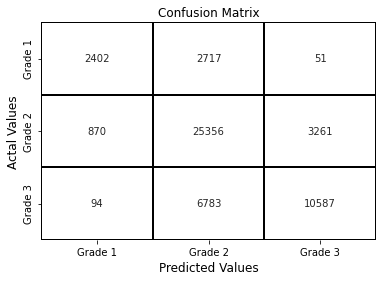

In [90]:
metric(model_rf_best, X_test, y_test)

In [91]:
submission_format = pd.read_csv("submission_format.csv")

In [92]:
X_test_competition = pd.read_csv("test_values.csv")

In [93]:
submission_format["damage_grade"] = model_rf_best.predict(X_test_competition)

In [94]:
submission_format.to_csv("dt_optimal_3.csv", index = False)

#### Gradient boosting 

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
column_selector_gb = ColumnTransformer([
    ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_columns[:-1]),
    ("numerical", OutlierTransformer(), numerical_columns)
])

In [70]:
pipe_gb = Pipeline([
    ("selector", column_selector_gb),
    ("scaler", StandardScaler(with_mean = False)),
    ("classifier", GradientBoostingClassifier(n_estimators = 20, random_state = 42))
])

In [76]:
param_grid = {"selector__numerical__upper": np.linspace(0.8, 1, 20),
              "classifier__max_depth": range(2,20), 
              "classifier__min_samples_split": range(2,100,2), 
              "classifier__min_samples_leaf": range(2,100,2), 
              "classifier__max_features" : range(30,39)}

random_search_gb = RandomizedSearchCV(pipe_gb, param_grid, cv = 3, verbose = 1, random_state = 42, n_iter = 200)

In [77]:
model_gb = random_search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


f1-micro score:  0.8265


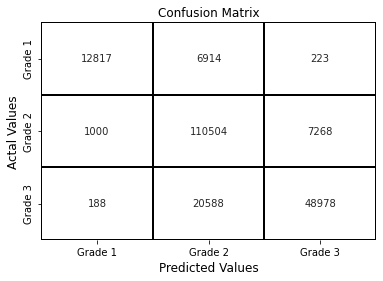

In [78]:
metric(model_gb, X_train, y_train)

f1-micro score:  0.7315


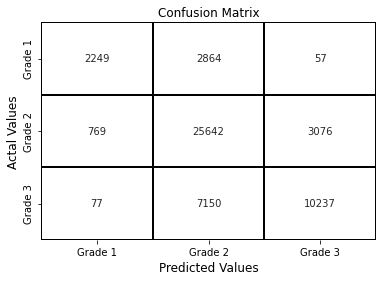

In [79]:
metric(model_gb, X_test, y_test)

In [80]:
model_gb.best_params_

{'selector__numerical__upper': 0.9368421052631579,
 'classifier__min_samples_split': 6,
 'classifier__min_samples_leaf': 14,
 'classifier__max_features': 34,
 'classifier__max_depth': 19}

In [81]:
column_selector_gb_v2 = ColumnTransformer([
    ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_columns[:-1]),
    ("numerical", OutlierTransformer(model_gb.best_params_["selector__numerical__upper"]), numerical_columns)
])

In [82]:
pipe_gb_v2 = Pipeline([
    ("selector", column_selector_gb_v2),
    ("scaler", StandardScaler(with_mean = False)),
    ("classifier", GradientBoostingClassifier(min_samples_split = model_gb.best_params_["classifier__min_samples_split"], 
                                              min_samples_leaf = model_gb.best_params_["classifier__min_samples_leaf"], 
                                              max_features = model_gb.best_params_["classifier__max_features"], 
                                              max_depth = model_gb.best_params_["classifier__max_depth"],
                                              random_state = 42))
])

In [83]:
param_grid_v2 = {"classifier__learning_rate": np.linspace(0.01, 1, 50), 
                 "classifier__subsample": np.linspace(0.01, 1, 50), 
                 "classifier__n_estimators": np.arange(10, 110, 5)}

random_search_v2 = RandomizedSearchCV(pipe_gb_v2, param_grid_v2, cv = 3, verbose = 1, n_iter = 200, random_state = 42)

In [84]:
model_gb_v2 = random_search_v2.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


f1-micro score:  0.9207


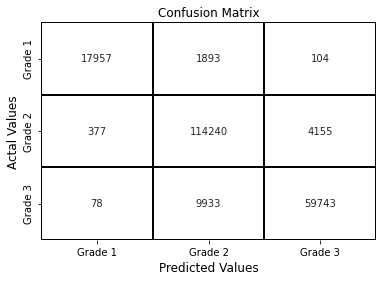

In [85]:
metric(model_gb_v2, X_train, y_train)

f1-micro score:  0.7368


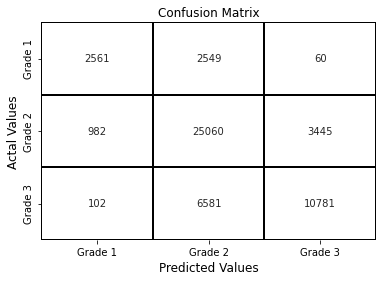

In [86]:
metric(model_gb_v2, X_test, y_test)

In [91]:
submission_format = pd.read_csv("submission_format.csv")

In [88]:
X_test_competition = pd.read_csv("test_values.csv")

In [92]:
submission_format["damage_grade"] = model_gb_v2.predict(X_test_competition)

In [94]:
submission_format.to_csv("submission_gb.csv", index = False)

In [96]:
model_gb_v2_results = pd.DataFrame(model_gb_v2.cv_results_).drop("params", axis = 1).set_index("rank_test_score").sort_index()

In [100]:
import pickle

pickle.dump(model_gb_v2_results, open("model_gb_v2_results.pkl", "wb"))

In [101]:
pickle.load(open("model_gb_v2_results.pkl", "rb"))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__subsample,param_classifier__n_estimators,param_classifier__learning_rate,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,270.955666,1.389749,1.722515,0.002272,0.878776,100,0.070612,0.729919,0.733311,0.732491,0.731907,0.001445
2,244.724743,1.142487,1.467392,0.005244,0.979796,80,0.070612,0.729732,0.733930,0.731757,0.731806,0.001714
3,238.794770,1.734881,1.651629,0.009585,0.818163,95,0.070612,0.731027,0.731599,0.732477,0.731701,0.000596
4,215.080602,1.443314,1.448007,0.006979,0.919184,75,0.050408,0.730264,0.731354,0.732246,0.731288,0.000810
5,236.412297,0.852108,1.523348,0.001699,0.959592,80,0.050408,0.729487,0.731858,0.732491,0.731279,0.001293
...,...,...,...,...,...,...,...,...,...,...,...,...
196,23.827114,0.100179,1.190995,0.002940,0.030204,95,0.515102,0.426526,0.475846,0.440778,0.447717,0.020724
197,14.731997,0.102837,0.976000,0.002161,0.01,95,0.333265,0.460140,0.447786,0.432130,0.446685,0.011462
198,34.615309,0.074827,1.414340,0.003863,0.050408,105,0.777755,0.455737,0.440548,0.443210,0.446498,0.006623


In [105]:
df[df["damage_grade"] == 1].describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.512400e+04,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,...,25124.000000,25124.000000,25124.00000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.0
mean,5.271413e+05,17.318261,652.934684,6277.995582,1.841307,17.320490,9.716009,5.147349,0.023643,0.348671,...,0.088203,0.034907,0.00394,0.001194,0.002348,0.000478,0.000517,0.000159,0.006965,1.0
std,3.044232e+05,8.513056,439.810772,3746.827334,0.825843,83.684844,6.289094,2.511039,0.151936,0.476559,...,0.283595,0.183548,0.06265,0.034535,0.048404,0.021850,0.022742,0.012617,0.083170,0.0
min,2.500000e+01,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.634778e+05,9.000000,219.000000,2902.000000,1.000000,0.000000,6.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,5.290425e+05,20.000000,661.000000,6400.000000,2.000000,5.000000,8.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,7.884928e+05,26.000000,1023.000000,9482.750000,2.000000,15.000000,12.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,1.052911e+06,30.000000,1426.000000,12565.000000,9.000000,995.000000,96.000000,24.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
